## SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Example in two dimensions:

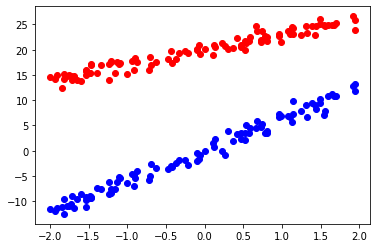

In [2]:
x_1 = np.random.uniform(-2,2,100)
x_2_a = 6*x_1 + np.random.normal(0,1,100)
x_2_b = 3*x_1 + np.random.normal(0,1,100) + 20

plt.scatter(x_1,x_2_a,color = "blue")
plt.scatter(x_1,x_2_b,color = "red")

y = np.concatenate([np.ones(len(x_1)),-1*np.ones(len(x_1))])

In [3]:
X = np.vstack([np.concatenate([x_1,x_1]),np.concatenate([x_2_a,x_2_b])]).T
X_ = np.hstack((X,np.ones((X.shape[0],1))))

In [4]:
w_0 = np.array([0 for i in range(X_.shape[1])])
#w_0 = np.random.normal(0,1,X_.shape[1])

In [16]:
1/len(X_)

0.005

In [26]:
def svm_function(w):
    return (1/2)*(np.dot(w.T,w)) + 0.008*np.sum(np.maximum(np.zeros(X_.shape[0]),(1-y*np.dot(X_,w))))

def gradient(w):
    return w + 0.008*np.dot(np.where((1-y*np.dot(X_,w)<=0),0,-y),X_)



In [27]:
from gradient_descent_impl import gradient_descent_



x_iters = gradient_descent_(gamma = 0.01,function = svm_function,d_function = gradient,x_0 = w_0,max_steps = 300000)

The algorithm converged in 2144 iters


In [7]:
svm_function( x_iters[-1])

2.1743042241624755

In [77]:
w_0 = x_iters[-1]

In [28]:
a = x_iters[-1][0]
b = x_iters[-1][1]
c = x_iters[-1][2]

In [116]:
a = w_0[0]
b = w_0[1]
c = w_0[2]

In [143]:
svm_function(x_iters[-1])

5.146397196167392

In [144]:
y_pred = np.dot(X_,x_iters[-1])

In [29]:
y_pred = (-np.concatenate([x_1,x_1])*a -c )/b 
y_pred_sup_pos = (1-np.concatenate([x_1,x_1])*a -c )/b 
y_pred_sup_neg = (-1-np.concatenate([x_1,x_1])*a -c )/b 

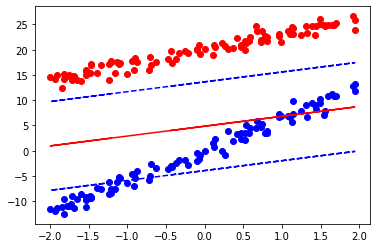

In [30]:
plt.scatter(x_1,x_2_a,color = "blue")
plt.scatter(x_1,x_2_b,color = "red")
plt.plot(np.concatenate([x_1,x_1]),y_pred,color = "red")
plt.plot(np.concatenate([x_1,x_1]),y_pred_sup_pos,color = "blue",linestyle = "--")
plt.plot(np.concatenate([x_1,x_1]),y_pred_sup_neg,color = "blue",linestyle = "--")